# Plot experiment results

In [1]:
%matplotlib inline
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import os
import pickle

In [2]:
plotDir="plots/"

In [3]:
def CountBinaryTrees(Nleaves):
    Tot=1
    for k in range(2*Nleaves-3,1,-2):
        Tot*=k
    return Tot

In [4]:
# indir = "/Users/sebastianmacaluso/Documents/HCmanager/experiments/ginkgo/ExactAstarApproxHeuristic/"
# filename = os.path.join(indir,"outjets_4N_20trees_11tcut_0_MaxSize_9_NumTries_40_20.pkl")
# with open(filename, "rb") as fd:
    
#     tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations, NodesExplored ,details,Ntrees= pickle.load(fd, encoding='latin-1')

In [5]:
#  tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations,NodesExplored, details,Ntrees

In [6]:
def load_results(scans, input_dir, algorithm, baseline=None):


#     algo_dict={}
    features = ["mean_tree_size", "mean_log_likelihoods", "log_likelihoods_err", "mean_illegal_actions", "mean_times", "times_err","mean_space_complexity","space_complexity_err" ,"nodes_explored", "nodes_explored_err", "Ntrees", "Ntrees_err"]
    algo_dict ={key:[] for key in features}

    
    baseline = "Greedy"
    indir = "/Users/sebastianmacaluso/Documents/HCmanager/experiments/ginkgo/"+str(input_dir)+"/"
    
    
    for scan in scans:
        i=0
        tree_size, log_likelihoods, illegal_actions, times, likelihood_evaluations, NodesExplored, Ntrees = [],[],[],[],[],[],[]
        for file in os.listdir(indir):
#             print("scan=", scan)
            filename= os.path.join(indir,file)
            if file.startswith(scan[0]) and file.endswith(scan[1]) and os.path.getsize(filename) > 0:
                i+=1
#                 print("file=", file)
                with open(filename, "rb") as fd:
        
                    tree_size_, log_likelihoods_, illegal_actions_, times_, likelihood_evaluations_, NodesExplored_, _, Ntrees_ = pickle.load(fd, encoding='latin-1')
                    if (log_likelihoods_[str(algorithm)]!=np.inf).any():
    
                        tree_size+= tree_size_
                        log_likelihoods =  np.concatenate((log_likelihoods, log_likelihoods_[str(algorithm)]),axis=0)
                        illegal_actions= np.concatenate((illegal_actions, illegal_actions_[str(algorithm)]),axis=0)
                        times= np.concatenate((times,times_[str(algorithm)]),axis=0)
                        likelihood_evaluations = np.concatenate((likelihood_evaluations,likelihood_evaluations_[str(algorithm)]),axis=0)

                        if NodesExplored_:
                            NodesExplored = np.concatenate((NodesExplored, NodesExplored_[str(algorithm)]),axis=0)
                        if Ntrees_:
                            Ntrees = np.concatenate((Ntrees, Ntrees_[str(algorithm)]),axis=0)

                    
        algo_dict["mean_tree_size"]+=[ np.nanmean(tree_size)]
        algo_dict["mean_log_likelihoods"]+=[np.nanmean(log_likelihoods)]
#         algo_dict["mean_log_likelihoods"]=np.concatenate((algo_dict["mean_log_likelihoods"],np.round(log_likelihoods,2)))
        algo_dict["log_likelihoods_err"]+=[np.nanstd(log_likelihoods) / np.sum(np.isfinite(log_likelihoods))**0.5]
    
        algo_dict["mean_times"] +=[np.nanmean(times) ]
        algo_dict["times_err"] +=[np.nanstd(times) / np.sum(np.isfinite(times))**0.5]
        
        if np.isnan(np.nanmean(likelihood_evaluations)):
            algo_dict["mean_space_complexity"] +=[np.nanmean(likelihood_evaluations) ]
        else:
            algo_dict["mean_space_complexity"] +=[int(np.nanmean(likelihood_evaluations) )]
            
        algo_dict["space_complexity_err"] +=[np.nanstd(likelihood_evaluations) / np.sum(np.isfinite(likelihood_evaluations))**0.5]
#         algo_dict["space_complexity_err"] +=[np.nanstd(likelihood_evaluations) / np.sum(np.isfinite(likelihood_evaluations))**0.5]
        
#         if i>=1:
#             if NodesExplored_:
        if np.isnan(np.nanmean(NodesExplored)):
            algo_dict["nodes_explored"] +=[np.nanmean(NodesExplored)]
        else:
            algo_dict["nodes_explored"] +=[int(np.nanmean(NodesExplored)) ]
        algo_dict["nodes_explored_err"] +=[np.nanstd(NodesExplored) / np.sum(np.isfinite(NodesExplored))**0.5]
            
#             if Ntrees_ :
        if np.isnan(np.nanmean(Ntrees)):
            algo_dict["Ntrees"] +=[np.nanmean(Ntrees)]
        else:
            algo_dict["Ntrees"] +=[int(np.nanmean(Ntrees)) ]
        algo_dict["Ntrees_err"] +=[np.nanstd(Ntrees) / np.sum(np.isfinite(Ntrees))**0.5]

    return algo_dict
    


In [7]:
scans=[]
for N in [80,100,150]:
    scans+=[["outjets_"+str(N)+"N_1trees_1tcut_", ""]]  

In [8]:
GreedyLD = load_results(scans, "BeamSearchGreedy", "Greedy")
BeamSearchLD = load_results(scans, "BeamSearchGreedy", "BS")

/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: Mean of empty slice


In [9]:
scans = []
for N in [80,100,150]:
    scans+=[["outjets_"+str(N)+"N_1trees_1tcut_", "_MaxSize_8_NumTries_4_2.pkl"]]  

In [10]:
ApproxAstarFullBLD = load_results(scans, "ApproxAstarFullBeam", "approx_a_star")

In [11]:
scans=[]
for N in [4,5,6,7,8,9]:
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
for N in [10]:
    scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
for N in [12]:
    scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
for N in [13,14,15,16,18,20 , 22,24, 28, 32, 36]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]

In [12]:
Greedy = load_results(scans, "BeamSearchGreedy", "Greedy")
BeamSearch = load_results(scans, "BeamSearchGreedy", "BS")
# BeamSearchL = load_results(scans, "BeamSearchGreedy1000", "BS")
ExactTrellis = load_results(scans, "ExactTrellis", "exact_trellis")
ExactAstar = load_results(scans, "ExactAstar", "exact_a_star")

/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


In [13]:
# scans=[]
# for N in [4,5,6,7,8,9]:    
#     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_20_NumTries_5_4.pkl"]]  
# # for N in [6,7,8,9]:
# #     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [10]:
#     scans+=[["outjets_"+str(N)+"N_5trees_11tcut_", "_MaxSize_20_NumTries_5_4.pkl"]]  
# for N in [12]:
#     scans+=[["outjets_"+str(N)+"N_2trees_11tcut_", "_MaxSize_20_NumTries_5_4.pkl"]]  
# for N in [13,14]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]
# for N in [15]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
# # for N in [17]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut___",""]]
# for N in [18]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [20]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [22]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# # for N in [24]:    
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]    
# # for N in [24]:    
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_5_3.pkl"]]     
# # for N in [28]:    
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_5_3.pkl"]]  
# # for N in [32, 36]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  
# for N in [24, 28,  32, 36]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]

In [14]:
# ApproxAstarApproxHeuristic =  load_results(scans, "ApproxAstarApproxHeuristic", "approx_a_star")

In [15]:
# len(ApproxAstarApproxHeuristic["mean_tree_size"])

In [16]:
scans=[]
for N in [4,5]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  
for N in [6,7,8,9]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]] 
for N in [10]:
    scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
for N in [12]:
    scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
for N in [13,14]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
for N in [15]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
for N in [16]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_100_60.pkl"]]  
for N in [18]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [17]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [20]:
        scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [22]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [24]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]    
# for N in [24]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_20_10.pkl"]]     
for N in [28]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
for N in [32, 36]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_8_NumTries_8_4.pkl"]]  
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_8_NumTries_15_8.pkl"]]  

In [17]:
ApproxAstarFullB = load_results(scans, "ApproxAstarFullBeam", "approx_a_star")

/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


In [18]:
# scans=[]
# for N in [4,5]:    
#     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
# for N in [6,7,8,9]:
#     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
# for N in [10]:
#     scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
# for N in [12]:
#     scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
# for N in [13,14]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_50_20.pkl"]]
# for N in [15]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
# # for N in [16]:    
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_100_60.pkl"]]  
# for N in [18]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# # for N in [17]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# # for N in [18]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_50_30.pkl"]]  
# for N in [20]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [22]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [24]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]    
# # for N in [24]:    
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_20_10.pkl"]]     
# for N in [28]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
# for N in [32, 36]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  

In [19]:
# ApproxAstar = load_results(scans, "ApproxAstar", "approx_a_star")

In [20]:
# scans=[]
# for N in [4,5,6,7,8,9]:    
#     scans+=[["outjets_"+str(N)+"N_20trees_11tcut___", "_MaxSize_20_NumTries_5_4.pkl"]]  
# # for N in [6,7,8,9]:
# #     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [10]:
#     scans+=[["outjets_"+str(N)+"N_5trees_11tcut___", "_MaxSize_20_NumTries_5_4.pkl"]]  
# for N in [12]:
#     scans+=[["outjets_"+str(N)+"N_2trees_11tcut___", "_MaxSize_20_NumTries_5_4.pkl"]]  
# for N in [13,14]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]
# for N in [15]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
# for N in [18]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [20]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [22]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [24]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]     
# for N in [28]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
# # for N in [32, 36]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  
# for N in [32, 36]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_8_NumTries_8_4.pkl"]]  
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_8_NumTries_15_8.pkl"]] 

In [21]:
# ApproxAstarApproxHeuristic =  load_results(scans, "ApproxAstarApproxHeuristic", "approx_a_star")

In [22]:
# scans=[]
# for N in [4,5,6,7,8,9]:    
#     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_20_NumTries_5_4.pkl"]]  
# # for N in [6,7,8,9]:
# #     scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [10]:
#     scans+=[["outjets_"+str(N)+"N_5trees_11tcut_", "_MaxSize_20_NumTries_5_4.pkl"]]  
# for N in [12]:
#     scans+=[["outjets_"+str(N)+"N_2trees_11tcut_", "_MaxSize_20_NumTries_5_4.pkl"]]  
# for N in [13,14]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_350_250.pkl"]]
# for N in [15]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_350_250.pkl"]]
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_350_250.pkl"]]  
# # for N in [17]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_350_250.pkl"]]  
# for N in [18]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_350_250.pkl"]]  
# for N in [20]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_100_60.pkl"]]  
# for N in [22]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_100_60.pkl"]]  
# # for N in [24]:    
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]    
# for N in [24]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]     
# for N in [28]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
# # for N in [32, 36]:
# #     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  
# for N in [32, 36]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]

In [23]:
# ApproxAstarApproxHeuristicL =  load_results(scans, "ApproxAstarApproxHeuristic", "approx_a_star")

In [24]:
# scans=[]
# for N in [4,5,6,7,8,9]:
#     scans+=["outjets_"+str(N)+"N_20trees_25tcut_"]
# for N in [10]:
#     scans+=["outjets_"+str(N)+"N_5trees_25tcut_"]
# for N in [12]:
#     scans+=["outjets_"+str(N)+"N_2trees_25tcut_"]
# for N in [13,14,15,16,18,22]:
#     scans+=["outjets_"+str(N)+"N_1trees_25tcut_"]

In [25]:
# algos = ['truth', 'Greedy', 'BS', 'exact_trellis', 'exact_a_star', 'approx_a_star']

# Greedy = load_results(scans, "BeamSearchGreedy", "Greedy")
# BeamSearch = load_results(scans, "BeamSearchGreedy", "BS")
# BeamSearchL = load_results(scans, "BeamSearchGreedy1000", "BS")
# ExactAstar = load_results(scans, "ExactAstar", "exact_a_star")
# ExactTrellis = load_results(scans, "ExactTrellis", "exact_trellis")

In [26]:
labels = {}

labels["Truth"] = "Truth"
labels["Greedy"] = "Greedy"
labels["BeamSearch"] = "Beam Search"
labels["ExactTrellis"] = "Exact Trellis"
labels["ExactAstar"] = "Exact $A^*$"
labels["ApproxAstarApproxHeuristic"] = "Approx. $A^*$"
labels["ApproxAstarFullB"]="Approx. $A^*$"
# labels["ExactAstar"] = "Exact $A^*$ (h1)"
# labels["ApproxAstarApproxHeuristic"] = "App. $A^*$ (h2)"
# labels["ApproxAstarFullB"]="App. $A^*$ (h1)"

labels["BeamSearchL"] = "Beam SearchL"
labels["ApproxAstarApproxHeuristicL"] = "App. $A^*$ L - App. H"
labels["ApproxAstar"] = "Approx. $A^*$"

# labels["mle"] = "MLE"
# labels["random"] = "Random"
# labels["greedy"] = "Greedy"

# labels["beamsearch_s"] = "Beam search"
# labels["beamsearch_m"] = "Beam search"
# labels["beamsearch_l"] = "Beam search"
# labels["beamsearch_xl"] = "Beam search"

# labels["mcts_xs"] = "MCTS"
# labels["mcts_s"] = "MCTS"
# labels["mcts_m"] = "MCTS"
# labels["mcts_l"] = "MCTS"

# labels["lfd"] = "BC"
# labels["lfd_mleteacher"] = "MLE-BC"

# labels["lfd-mcts_xs"] = "BC-MCTS"
# labels["lfd-mcts_s"] = "BC-MCTS"
# labels["lfd-mcts_m"] = "BC-MCTS"
# labels["lfd-mcts_l"] = "BC-MCTS"
# labels["lfd-mcts_mleteacher_xs"] = "BC-MCTS (MLE)"
# labels["lfd-mcts_mleteacher_s"] = "BC-MCTS (MLE)"
# labels["lfd-mcts_mleteacher_m"] = "BC-MCTS (MLE)"
# labels["lfd-mcts_mleteacher_l"] = "BC-MCTS (MLE)"

In [27]:
colors = {}

# https://coolors.co/053e61-337299-e6754c-e2bf9c-000000-808080
# blue0, blue1 = "#053E61", "#337299"
# red0, red1 = "#E6754C", "#E2BF9C"
# bw0, bw1 = "#000000", "#808080"

# https://coolors.co/000000-064a75-4984ab-ffaa33-b8b8b8
# blue0, blue1 = "#064A75", "#4984AB"
# red0, red1 = "#FFAA33", "#FFAA33"
# bw0, bw1 = "#000000", "#B8B8B8"



# https://color.adobe.com/My%20Color%20Blind%20Safe%20Theme-color-theme-15969589
# Color blind palette
col1,col2,col3,col4,col5,col6 = "#5FC49F","#FAC97C", "#000000","#6B6DC9","#388DC2","#FB7C7F"
# col1,col2,col3,col4,col5, col6 = "#4477AA","#66CCEE","#228833","#CCBB44","#EE6677","AA3377"

colors["Greedy"] =  col2
colors["BeamSearch"] = col1
colors["ExactTrellis"] = col3
colors["ExactAstar"] = col6
colors["ApproxAstarFullB"] = col5
colors["ApproxAstarApproxHeuristic"]=col4



# colors["Greedy"] =  "#FAC97C"
# colors["BeamSearch"] = "#5FC49F"
# colors["ExactTrellis"] = "#000000"
# colors["ExactAstar"] = "#FB7C7F"
# colors["ApproxAstar"] = "#388DC2"




# https://coolors.co/000000-1d3557-457b9d-98CBCD-e63746
blue0, blue1, blue2 , blue3= "#1d3557", "#457b9d", "#98CBCD", "#028090"
red0, red1, red2, red3 , red4= "#e63746", "#e63746", "#FF715B", "#F15025", "#A33B20"
bw0, bw1 = "#000000", "#000000"
green0, green1, green2 = "#A5C882", "#6EB257","#28965A"

# colors["mle"] = bw0
# colors["random"] = blue0

# colors["Greedy"] =  blue0
# colors["BeamSearch"] = blue1
# # colors["BeamSearchL"] = blue0
# colors["ExactTrellis"] = bw0
# colors["ExactAstar"] = red3
# colors["ApproxAstarApproxHeuristic"]=blue3
# colors["ApproxAstarFullB"] = green2

# colors["ApproxAstar"] = red4
colors["ApproxAstarApproxHeuristicL"]=bw1


# colors["ApproxAstar"] = red3


# colors["beamsearch_s"] = blue2

# colors["mcts_xs"] = red0
# colors["lfd-mcts_xs"] = red1
# colors["lfd-mcts_mleteacher_xs"] = red1
# colors["lfd"] = red0
# colors["lfd_mleteacher"] = red1

# colors["beamsearch_m"] = colors["beamsearch_l"] = colors["beamsearch_xl"] = colors["beamsearch_s"]
# colors["mcts_s"] = colors["mcts_m"] = colors["mcts_l"] = colors["mcts_xs"]
# colors["lfd-mcts_s"] = colors["lfd-mcts_m"] = colors["lfd-mcts_l"] = colors["lfd-mcts_xs"]
# colors["lfd-mcts_mleteacher_s"] = colors["lfd-mcts_mleteacher_m"] = colors["lfd-mcts_mleteacher_l"] = colors["lfd-mcts_mleteacher_xs"]

In [28]:
alphas = {}

for key, color in colors.items():
    if color == blue0 or color == blue1:
        alphas[key] = 0.1
    elif color == red2:
        alphas[key] = 0.12
    elif color == bw0:
        alphas[key] = 0.12
    else:
        alphas[key] = 0.15

In [29]:
linestyles = {}


linestyles["Greedy"] = "-"
linestyles["BeamSearch"] = "-"
linestyles["BeamSearchL"] = "--"
linestyles["ExactTrellis"] = ":"
linestyles["ExactAstar"] = "-."
linestyles["ApproxAstar"] = "--"
linestyles["ApproxAstarApproxHeuristic"] = "-."
linestyles["ApproxAstarApproxHeuristicL"] = "-."
linestyles["ApproxAstarFullB"]="-."
# linestyles["truth"] = "-."
# linestyles["mle"] = ":"
# linestyles["random"] = "-."

# linestyles["greedy"] = "--"

# linestyles["beamsearch_s"] = "-."
# linestyles["beamsearch_m"] = "-."
# linestyles["beamsearch_l"] = "-."
# linestyles["beamsearch_xl"] = "-."

# linestyles["mcts_xs"] = "-"
# linestyles["mcts_s"] = "-"
# linestyles["mcts_m"] = "-"
# linestyles["mcts_l"] = "-"

# linestyles["lfd-mcts_xs"] = ":"
# linestyles["lfd-mcts_s"] = ":"
# linestyles["lfd-mcts_m"] = ":"
# linestyles["lfd-mcts_l"] = ":"
# linestyles["lfd-mcts_mleteacher_xs"] = "-."
# linestyles["lfd-mcts_mleteacher_s"] = "-."
# linestyles["lfd-mcts_mleteacher_m"] = "-."
# linestyles["lfd-mcts_mleteacher_l"] = "-."

# linestyles["lfd"] = ":"
# linestyles["lfd_mleteacher"] = "-"


In [30]:
markers = {}

markers["Greedy"] = "."
markers["BeamSearch"] = "o"
markers["ExactTrellis"] = "*"
markers["ExactAstar"] = "s"
markers["ApproxAstarFullB"]="^"

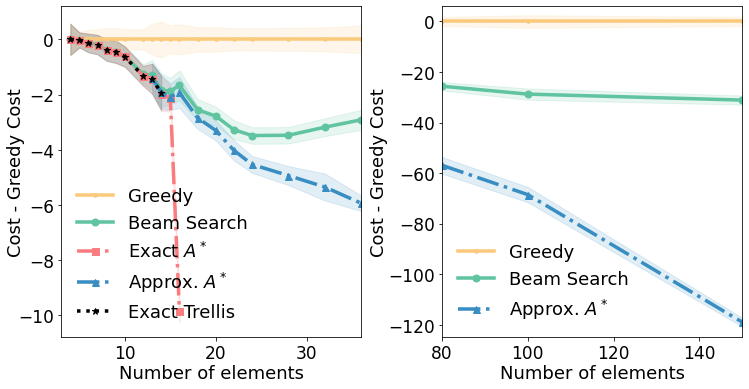

In [31]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)

# algorithms1 ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic,"ExactTrellis":ExactTrellis}
algorithms1 ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ExactTrellis":ExactTrellis}

i=0
baseline = algorithms1["Greedy"]
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], - np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["log_likelihoods_err"]
    c, ls, lbl, alpha, mk = colors[key], linestyles[key], labels[key], alphas[key], markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)
#     axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker="^")


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Cost - Greedy Cost", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].grid(which='both', axis='both', linestyle='--')
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.12, 0.5)
# # ax.set_yscale('log')
axes[i].set_xlim(3,36)
# axes[i].set_ylim(-10.3,0.5)

algorithms2 ={"Greedy":GreedyLD, "BeamSearch":BeamSearchLD ,"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = algorithms2["Greedy"]
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], - np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["log_likelihoods_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Cost - Greedy Cost", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.18, 0.5)
# # ax.set_yscale('log')
axes[i].set_xlim(80,150)
axes[i].set_ylim(-125,6)


saveFig=True    
if saveFig:
    fig2.savefig(plotDir+"GinkgoCostRelativetoGreedyx2_v2.pdf", bbox_inches='tight')

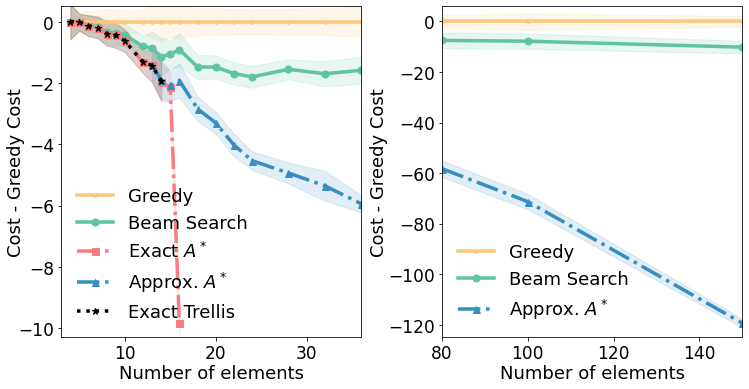

In [48]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)

# algorithms1 ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic,"ExactTrellis":ExactTrellis}
algorithms1 ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ExactTrellis":ExactTrellis}

i=0
baseline = algorithms1["Greedy"]
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], - np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["log_likelihoods_err"]
    c, ls, lbl, alpha, mk = colors[key], linestyles[key], labels[key], alphas[key], markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)
#     axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker="^")


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Cost - Greedy Cost", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.12, 0.5)
# # ax.set_yscale('log')
axes[i].set_xlim(3,36)
axes[i].set_ylim(-10.3,0.5)

algorithms2 ={"Greedy":GreedyLD, "BeamSearch":BeamSearchLD ,"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = algorithms2["Greedy"]
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], - np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["log_likelihoods_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Cost - Greedy Cost", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.18, 0.5)
# # ax.set_yscale('log')
axes[i].set_xlim(80,150)
axes[i].set_ylim(-125,6)


saveFig=True    
if saveFig:
    fig2.savefig(plotDir+"GinkgoCostRelativetoGreedyx2_v2.pdf", bbox_inches='tight')

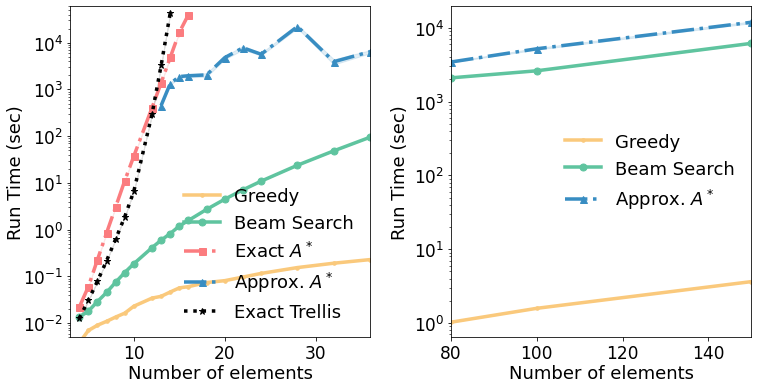

In [32]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)

algorithms1 ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ExactTrellis":ExactTrellis}

i=0
baseline = algorithms1["Greedy"]
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["mean_times"], value["times_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Run Time (sec)", fontsize=18)
axes[i].legend(loc="lower right", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.15, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(3,36)
axes[i].set_ylim(5*10**(-3),6*10**4)

algorithms2 ={"Greedy":GreedyLD, "BeamSearch":BeamSearchLD ,"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = algorithms2["Greedy"]
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["mean_times"], value["times_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Run Time (sec)", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.14, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(80,150)
# axes[i].set_ylim(-125,6)


saveFig=True    
if saveFig:
    fig2.savefig(plotDir+"GinkgoRunTimex2_v2.pdf", bbox_inches='tight')
    
    


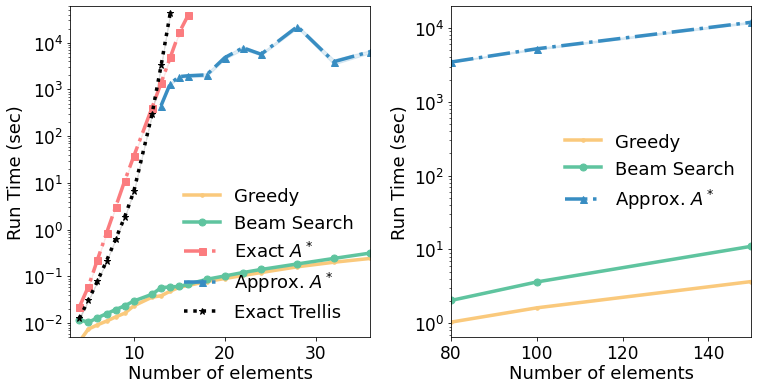

In [49]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)

algorithms1 ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ExactTrellis":ExactTrellis}

i=0
baseline = algorithms1["Greedy"]
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["mean_times"], value["times_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Run Time (sec)", fontsize=18)
axes[i].legend(loc="lower right", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.15, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(3,36)
axes[i].set_ylim(5*10**(-3),6*10**4)

algorithms2 ={"Greedy":GreedyLD, "BeamSearch":BeamSearchLD ,"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = algorithms2["Greedy"]
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["mean_times"], value["times_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Run Time (sec)", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.14, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(80,150)
# axes[i].set_ylim(-125,6)


saveFig=True    
if saveFig:
    fig2.savefig(plotDir+"GinkgoRunTimex2_v2.pdf", bbox_inches='tight')
    
    


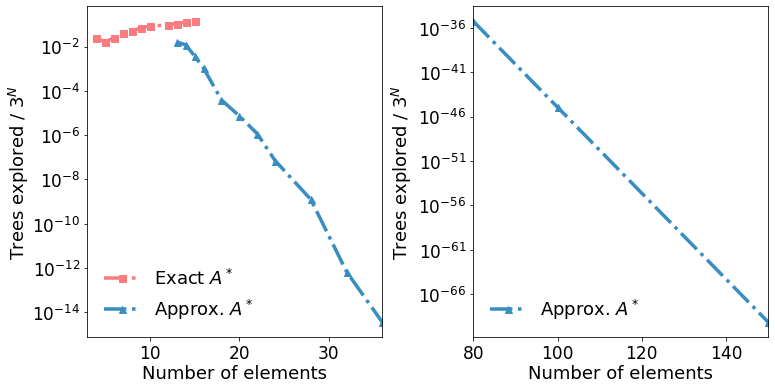

In [33]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=6, h_pad=1.0)

algorithms1 ={"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB}

i=0
baseline = Greedy
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["Ntrees"]/3**np.asarray(baseline["mean_tree_size"]), value["Ntrees_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
#     if np.nanmax(dy) > 1.e-3:
#         axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Trees explored / $3^N$", fontsize=18)
axes[i].legend(loc="lower left", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.19, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(3,36)
# axes[i].set_ylim(5*10**(-3),6*10**4)

algorithms2 ={"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = GreedyLD
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["Ntrees"]/3**np.asarray(baseline["mean_tree_size"]), value["Ntrees_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
#     if np.nanmax(dy) > 1.e-3:
#         axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Trees explored / $3^N$", fontsize=18)
axes[i].legend(loc="lower left", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.2, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(80,150)
# axes[i].set_ylim(-125,6)


saveFig=True    
if saveFig:
    fig2.savefig(plotDir+"GinkgoTreesExploredvsTrellisx2_v2.pdf", bbox_inches='tight')
    




In [830]:
ApproxAstarFullBLD["Ntrees"]/3**np.asarray(GreedyLD["mean_tree_size"])

array([5.14177673e-36, 1.07688050e-45, 6.81102278e-70])

(80.0, 150.0)

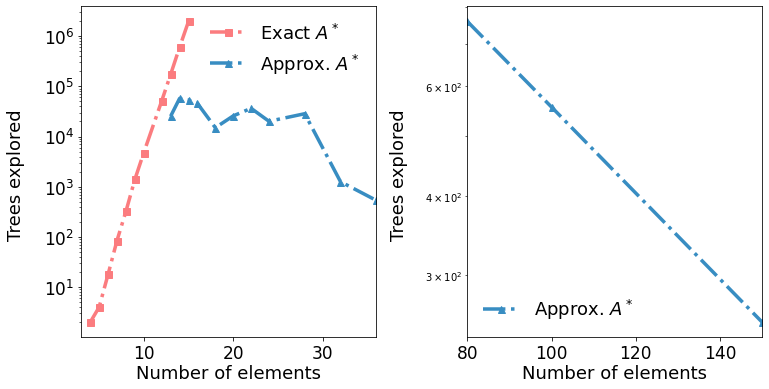

In [34]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=6, h_pad=1.0)

algorithms1 ={"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB}

i=0
baseline = Greedy
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["Ntrees"], value["Ntrees_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
#     if np.nanmax(dy) > 1.e-3:
#         axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Trees explored ", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.19, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(3,36)
# axes[i].set_ylim(5*10**(-3),6*10**4)

algorithms2 ={"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = GreedyLD
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["Ntrees"], value["Ntrees_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
#     if np.nanmax(dy) > 1.e-3:
#         axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Trees explored ", fontsize=18)
axes[i].legend(loc="lower left", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.2, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(80,150)
# axes[i].set_ylim(-125,6)


# saveFig=True    
# if saveFig:
#     fig2.savefig(plotDir+"GinkgoTreesExploredvsTrellisx2_v2.pdf", bbox_inches='tight')

(80.0, 150.0)

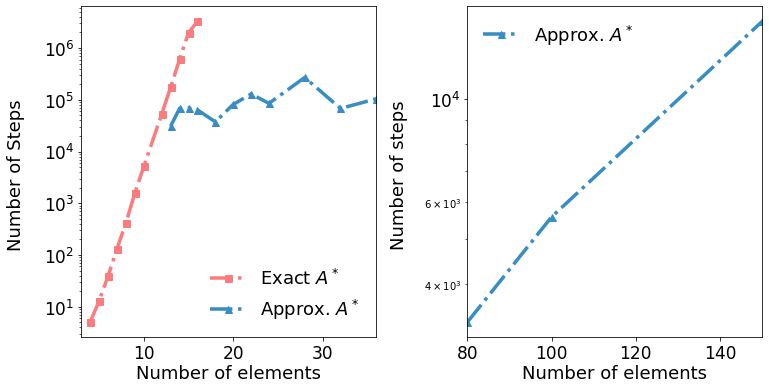

In [35]:
fig2, (axes) = plt.subplots(nrows=1, ncols=2 ,gridspec_kw={'width_ratios': [1, 1]})
fig2.set_size_inches(10,5)
plt.tight_layout(pad=0.4, w_pad=6, h_pad=1.0)

algorithms1 ={"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB}

i=0
baseline = Greedy
for key,value in algorithms1.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_space_complexity"], value["space_complexity_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
#     if np.nanmax(dy) > 1.e-3:
#         axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Number of Steps ", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.19, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(3,36)
# axes[i].set_ylim(5*10**(-3),6*10**4)

algorithms2 ={"ApproxAstarFullB":ApproxAstarFullBLD}

i=1
baseline = GreedyLD
for key,value in algorithms2.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_space_complexity"], value["space_complexity_err"]
    c, ls, lbl, alpha ,mk= colors[key], linestyles[key], labels[key], alphas[key],markers[key]
#     print("dy = ", np.max(dy))
#     if np.nanmax(dy) > 1.e-3:
#         axes[i].fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    axes[i].plot(x, y, c=c, lw=3.5, ls=ls, label=lbl, marker=mk, markersize=7)


axes[i].set_xlabel("Number of elements", fontsize=18)
axes[i].set_ylabel(f"Number of steps ", fontsize=18)
axes[i].legend(loc="best", frameon=False,fontsize=18)
axes[i].tick_params(labelsize=17) 
# axes[i].yaxis.set_major_locator(MultipleLocator(1.))
# axes[i].yaxis.set_minor_locator(MultipleLocator(0.2))
# axes[i].xaxis.set_major_locator(MultipleLocator(5.))
# axes[i].xaxis.set_minor_locator(MultipleLocator(1.))
axes[i].xaxis.set_label_coords(0.5, -0.08)
axes[i].yaxis.set_label_coords(-0.2, 0.5)
axes[i].set_yscale('log')
axes[i].set_xlim(80,150)
# axes[i].set_ylim(-125,6)


# saveFig=True    
# if saveFig:
#     fig2.savefig(plotDir+"GinkgoTreesExploredvsTrellisx2_v2.pdf", bbox_inches='tight')

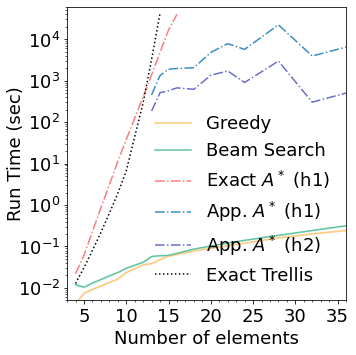

In [632]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar, "ExactTrellis":ExactTrellis,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ApproxAstar":ApproxAstar}

algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic,"ExactTrellis":ExactTrellis}
fig = plt.figure(figsize=(5,5.4))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_times"], value["times_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="lower right", frameon=False, fontsize=fontsize)

ax.tick_params(labelsize=fontsize) 
ax.set_yscale('log')
# ax.yaxis.set_label_coords(-0.1, 0.5)
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
# ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Run Time (sec)", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlim(3,36)
plt.ylim(5*10**(-3),6*10**4)
saveFig=True
# saveFig=False
if saveFig:
    fig.savefig(plotDir+"GinkgoRunTime.pdf", bbox_inches='tight')

In [590]:
30000/3600

8.333333333333334

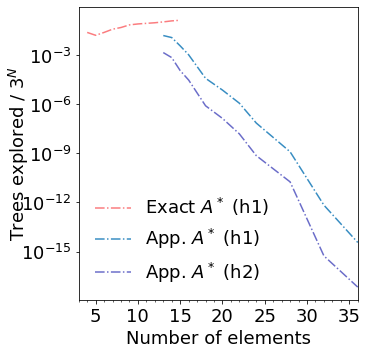

In [633]:
fontsize=18
baseline = Greedy

TotalTrees=np.asarray([CountBinaryTrees(int(m)) for m in baseline["mean_tree_size"]])

# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"ExactAstar":ExactAstar, "ApproxAstar":ApproxAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic}
# algorithms={"ExactAstar":ExactAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}

# algorithms={"ExactAstar":ExactAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic,  "ApproxAstarFullB":ApproxAstarFullB}
algorithms ={"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic}
fig = plt.figure(figsize=(5.,5.4))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["Ntrees"]/3**np.asarray(baseline["mean_tree_size"]), value["Ntrees_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="best", frameon=False, fontsize=fontsize)
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
# ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Trees explored / $3^N$", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.17, 0.5)
ax.set_yscale('log')
plt.xlim(3,36)
# plt.ylim(5*10**(-3),6*10**4)
saveFig=True    
if saveFig:
    fig.savefig(plotDir+"GinkgoTreesExploredvsTrellis.pdf", bbox_inches='tight')

In [652]:
Greedy

{'mean_tree_size': [80.0, 100.0, 150.0],
 'mean_log_likelihoods': [-164.85905983320794,
  -207.4561044303363,
  -285.9915742212209],
 'log_likelihoods_err': [2.619108995740809,
  3.267778898387161,
  2.146756411128486],
 'mean_illegal_actions': [],
 'mean_times': [1.0370365810394286, 1.618368844985962, 3.670460376739502],
 'times_err': [0.00585877649148346,
  0.011459284541300071,
  0.022806276487611042],
 'mean_space_complexity': [85320, 166650, 562475],
 'space_complexity_err': [0.0, 0.0, 0.0],
 'nodes_explored': [nan, nan, nan],
 'nodes_explored_err': [nan, nan, nan],
 'Ntrees': [nan, nan, nan],
 'Ntrees_err': [nan, nan, nan]}

In [650]:
ApproxAstarFullB

{'mean_tree_size': [80.0, 100.0, 150.0],
 'mean_log_likelihoods': [-106.56113845901822,
  -136.1351005676256,
  -166.63841750572473],
 'log_likelihoods_err': [3.282966463945418,
  3.0412847566958128,
  1.7540506071329662],
 'mean_illegal_actions': [],
 'mean_times': [3453.0514524650575, 5215.626218624115, 11919.369037456512],
 'times_err': [49.183629829689586, 129.98354138234703, 343.7774014551784],
 'mean_space_complexity': [3313, 5574, 14653],
 'space_complexity_err': [265.7681484602698,
  619.5050558114921,
  1501.5725765423392],
 'nodes_explored': [15102, 37077, 151126],
 'nodes_explored_err': [1358.9266529139827,
  4518.353459703657,
  14569.091864629037],
 'Ntrees': [760, 555, 252],
 'Ntrees_err': [128.60165498157477, 84.40786920660892, 54.10629538233051]}

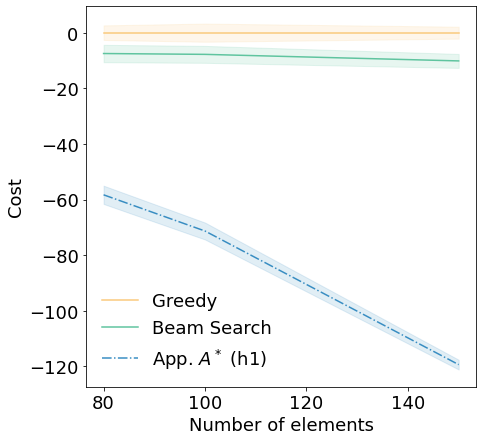

In [701]:
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "BeamSearchL":BeamSearchL}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar, "ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar, "ExactTrellis":ExactTrellis,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}


algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ApproxAstarFullB":ApproxAstarFullB}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch}
# algorithms ={"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic}
fig = plt.figure(figsize=(7.0,7.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"],- np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]), value["log_likelihoods_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
#     print("dy = ", np.max(dy))
    if np.nanmax(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="best", frameon=False,fontsize=18)

ax.tick_params(labelsize=18) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
# ax.xaxis.set_major_locator(MultipleLocator(5.))
# ax.xaxis.set_minor_locator(MultipleLocator(1.))
# ax.grid(which='major', axis='both', linestyle='--')
# ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=18)
# plt.ylabel(f"HC log LH relative to Greedy", fontsize=18)
plt.ylabel(f"Cost", fontsize=18)
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.yaxis.set_label_coords(-0.1, 0.5)
# ax.set_yscale('log')
# plt.xlim(3,36)
# plt.ylim(-0.7,10.3)
# plt.ylim(0,10.3)
saveFig=True    
if saveFig:
    fig.savefig(plotDir+"GinkgoLogLHrelativetoGreedyL.pdf", bbox_inches='tight')

In [ ]:
scans=[]
for N in [4,5]:    
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
for N in [6,7,8,9]:
    scans+=[["outjets_"+str(N)+"N_20trees_11tcut_",""]]
for N in [10]:
    scans+=[["outjets_"+str(N)+"N_5trees_11tcut_",""]]
for N in [12]:
    scans+=[["outjets_"+str(N)+"N_2trees_11tcut_",""]]
for N in [13,14]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_50_20.pkl"]]
for N in [15]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_50_20.pkl"]]
for N in [16]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_40_20.pkl"]]  
# for N in [16]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_10_NumTries_100_60.pkl"]]  
for N in [18]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
# for N in [18]:
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_50_30.pkl"]]  
for N in [20]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [22]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_35_18.pkl"]]  
for N in [24]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]    
# for N in [24]:    
#     scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_20_10.pkl"]]     
for N in [28]:    
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_", "_MaxSize_9_NumTries_25_15.pkl"]]  
for N in [32, 36]:
    scans+=[["outjets_"+str(N)+"N_1trees_11tcut_",""]]  

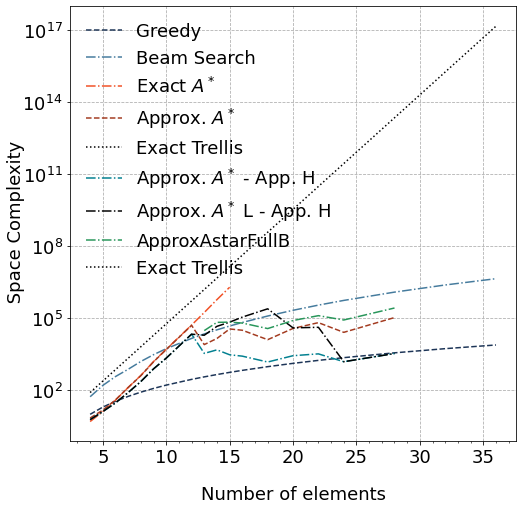

In [364]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar}
algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch ,"ExactAstar":ExactAstar,"ApproxAstar":ApproxAstar, "ExactTrellis":ExactTrellis,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ApproxAstar":ApproxAstar}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["mean_space_complexity"], value["space_complexity_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

# Trellis complexity
plt.plot(x, 3**np.asarray(x),c=bw0, lw=1.5, ls=":",label="Exact Trellis")
    
    
plt.legend(loc="upper left", frameon=False, fontsize=18)
ax.set_yscale('log')
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements" ,fontsize=18)
plt.ylabel(f" Space Complexity" ,fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.xlim(3,22)

In [320]:
len(baseline["mean_tree_size"])

19

In [322]:
len(ApproxAstarFullB["nodes_explored"])

11

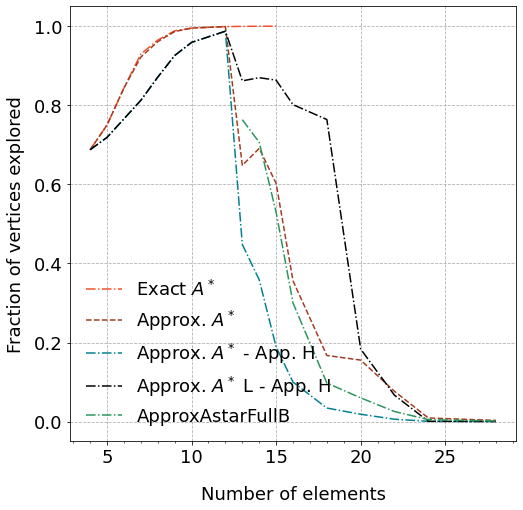

In [365]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
algorithms ={"ExactAstar":ExactAstar, "ApproxAstar":ApproxAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["nodes_explored"]/ 2**np.asarray(baseline["mean_tree_size"]), value["nodes_explored_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="lower left", frameon=False, fontsize=fontsize)
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Fraction of vertices explored", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.xlim(3,22)

(1000.0, 2000000.0)

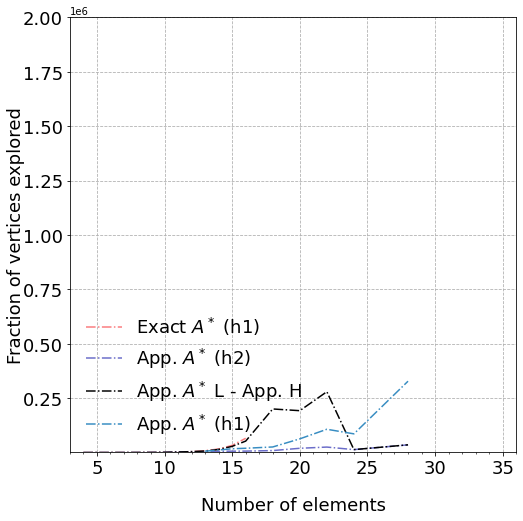

In [589]:
fontsize=18
baseline = Greedy
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"ExactAstar":ExactAstar, "ApproxAstar":ApproxAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}
algorithms ={"ExactAstar":ExactAstar, "ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = value["mean_tree_size"], value["nodes_explored"], value["nodes_explored_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="lower left", frameon=False, fontsize=fontsize)
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Fraction of vertices explored", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlim(3,36)
plt.ylim(1000, 2000000)

In [863]:
CountBinaryTrees(16)

8200794532637891559375

In [869]:
np.log10(float(CountBinaryTrees(50)))

76.43979380444715

In [42]:
len(str(CountBinaryTrees(150)))

305

In [1]:
def CountBinaryTrees(Nleaves):
    Tot=1
    for k in range(2*Nleaves-3,1,-2):
        Tot*=k
    return Tot

In [161]:
np.asarray([CountBinaryTrees(int(m)) for m in baseline["mean_tree_size"]])

array([15, 105, 945, 10395, 135135, 2027025, 34459425, 13749310575,
       316234143225, 7905853580625, 213458046676875, 6190283353629375,
       6332659870762850625, 8200794532637891559375,
       13113070457687988603440625, 25373791335626257947657609375,
       157952079428395476360490147277859375,
       1782151988659863326386101665566204817109375,
       33738248995437774706530672059641953140588743359375], dtype=object)

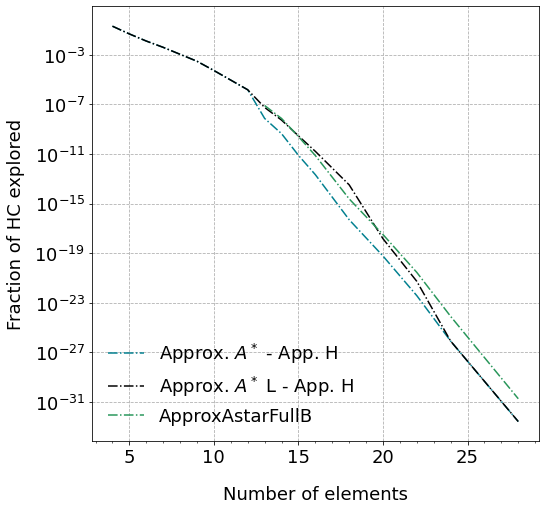

In [367]:
fontsize=18
baseline = Greedy

TotalTrees=np.asarray([CountBinaryTrees(int(m)) for m in baseline["mean_tree_size"]])

# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
algorithms ={"ExactAstar":ExactAstar, "ApproxAstar":ApproxAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic}
algorithms={"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}
fig = plt.figure(figsize=(8.0,8.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["Ntrees"]/TotalTrees, value["Ntrees_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="best", frameon=False, fontsize=fontsize)
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Fraction of HC explored", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.15, 0.5)
ax.set_yscale('log')

# plt.xlim(3,22)

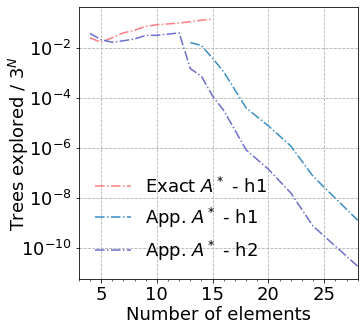

In [558]:
fontsize=18
baseline = Greedy

TotalTrees=np.asarray([CountBinaryTrees(int(m)) for m in baseline["mean_tree_size"]])

# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch, "ExactAstar":ExactAstar,"ExactTrellis":ExactTrellis, "ApproxAstar":ApproxAstar}
# algorithms ={"Greedy":Greedy, "BeamSearch":BeamSearch,"ExactTrellis":ExactTrellis}
# algorithms ={"ExactAstar":ExactAstar, "ApproxAstar":ApproxAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic}
# algorithms={"ExactAstar":ExactAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic, "ApproxAstarApproxHeuristicL":ApproxAstarApproxHeuristicL, "ApproxAstarFullB":ApproxAstarFullB}

# algorithms={"ExactAstar":ExactAstar,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic,  "ApproxAstarFullB":ApproxAstarFullB}
algorithms ={"ExactAstar":ExactAstar,"ApproxAstarFullB":ApproxAstarFullB,"ApproxAstarApproxHeuristic":ApproxAstarApproxHeuristic}
fig = plt.figure(figsize=(5.0,5.0))

# Larger plot
ax = plt.gca()
    
for key,value in algorithms.items():
#     print("baseline[mean_tree_size]", baseline["mean_tree_size"])
#     print("value=","std=", value["std_log_likelihoods"])
#     print("subtract = ",np.subtract(value["mean_log_likelihoods"],baseline["mean_log_likelihoods"]))
    x, y, dy = baseline["mean_tree_size"], value["Ntrees"]/3**np.asarray(baseline["mean_tree_size"]), value["Ntrees_err"]
    c, ls, lbl, alpha = colors[key], linestyles[key], labels[key], alphas[key]
    if np.max(dy) > 1.e-3:
        plt.fill_between(x, np.subtract(y,dy), np.add(y,dy), color=c, alpha=alpha)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="best", frameon=False, fontsize=fontsize)
ax.tick_params(labelsize=fontsize) 
# ax.yaxis.set_major_locator(MultipleLocator(1.))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.grid(which='major', axis='both', linestyle='--')
plt.xlabel("Number of elements", fontsize=fontsize)
plt.ylabel(f"Trees explored / $3^N$", fontsize=fontsize)
ax.xaxis.set_label_coords(0.5, -0.1)
ax.yaxis.set_label_coords(-0.17, 0.5)
ax.set_yscale('log')
plt.xlim(3,28)
# plt.ylim(5*10**(-3),6*10**4)
saveFig=False    
if saveFig:
    fig.savefig(plotDir+"GinkgoTreesExploredvsTrellis.pdf", bbox_inches='tight')

###### 

In [17]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_4N_500trees_23tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

In [18]:
N = [len(jet["leaves"]) for jet in jet_list]

(array([ 7.,  7., 21.,  0., 35., 53., 65.,  0., 71., 68., 55.,  0., 43.,
        36., 21.,  0., 12.,  5.,  0.,  1.]),
 array([ 5.  ,  5.75,  6.5 ,  7.25,  8.  ,  8.75,  9.5 , 10.25, 11.  ,
        11.75, 12.5 , 13.25, 14.  , 14.75, 15.5 , 16.25, 17.  , 17.75,
        18.5 , 19.25, 20.  ]),
 <a list of 20 Patch objects>)

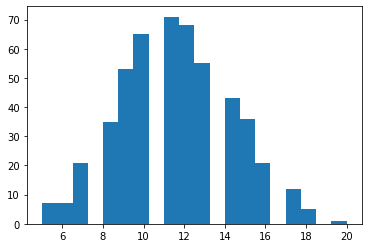

In [19]:
plt.hist(N, bins=20)

In [245]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_500trees_10tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

In [246]:
N = [len(jet["leaves"]) for jet in jet_list]

(array([ 6.,  4.,  3., 10., 17., 17., 26., 26., 70., 33., 33., 39., 70.,
        38., 25., 24., 31., 10., 11.,  7.]),
 array([ 7.  ,  8.25,  9.5 , 10.75, 12.  , 13.25, 14.5 , 15.75, 17.  ,
        18.25, 19.5 , 20.75, 22.  , 23.25, 24.5 , 25.75, 27.  , 28.25,
        29.5 , 30.75, 32.  ]),
 <a list of 20 Patch objects>)

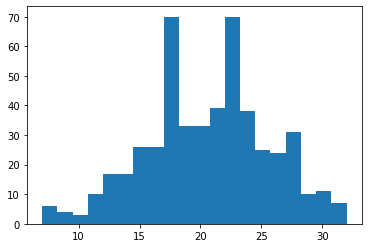

In [247]:
plt.hist(N, bins=20)

(array([  4.,   2.,   3.,  17.,  21.,  65.,  86.,  41., 123.,  80., 180.,
        134.,  51.,  82.,  30.,  41.,  26.,   9.,   4.,   1.]),
 array([ 6. ,  7.6,  9.2, 10.8, 12.4, 14. , 15.6, 17.2, 18.8, 20.4, 22. ,
        23.6, 25.2, 26.8, 28.4, 30. , 31.6, 33.2, 34.8, 36.4, 38. ]),
 <a list of 20 Patch objects>)

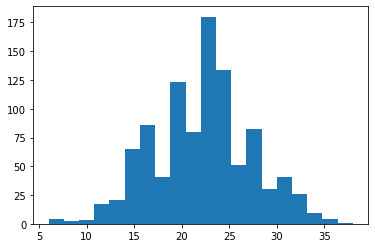

In [249]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_9tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

(array([  5.,  14.,  28.,  17.,  51.,  54., 124.,  66., 151.,  78., 139.,
         56.,  81.,  31.,  56.,  23.,  14.,   4.,   7.,   1.]),
 array([ 9. , 10.5, 12. , 13.5, 15. , 16.5, 18. , 19.5, 21. , 22.5, 24. ,
        25.5, 27. , 28.5, 30. , 31.5, 33. , 34.5, 36. , 37.5, 39. ]),
 <a list of 20 Patch objects>)

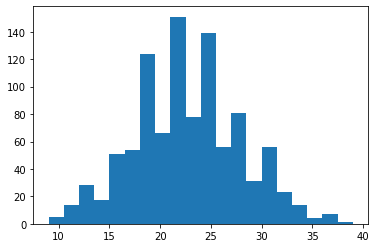

In [252]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_9tcut_14rate_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

(array([  4.,  12.,   9.,  20.,  45.,  27.,  87., 119.,  66., 159., 121.,
         56., 109.,  76.,  28.,  35.,  14.,   3.,   8.,   2.]),
 array([ 7.  ,  8.65, 10.3 , 11.95, 13.6 , 15.25, 16.9 , 18.55, 20.2 ,
        21.85, 23.5 , 25.15, 26.8 , 28.45, 30.1 , 31.75, 33.4 , 35.05,
        36.7 , 38.35, 40.  ]),
 <a list of 20 Patch objects>)

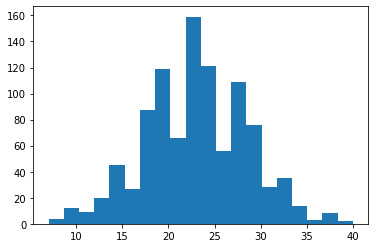

In [253]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_8tcut_15rate_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)

(array([  1.,   6.,   9.,   9.,  22.,  50.,  68.,  44., 132., 129., 142.,
         74.,  97.,  83.,  62.,  18.,  31.,  15.,   6.,   2.]),
 array([ 6.  ,  7.75,  9.5 , 11.25, 13.  , 14.75, 16.5 , 18.25, 20.  ,
        21.75, 23.5 , 25.25, 27.  , 28.75, 30.5 , 32.25, 34.  , 35.75,
        37.5 , 39.25, 41.  ]),
 <a list of 20 Patch objects>)

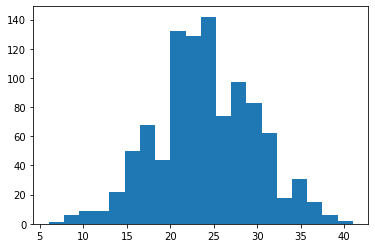

In [248]:
indir = "/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/ginkgo/data/invMassGinkgo/"
filename = os.path.join(indir,"jets_0N_1000trees_8tcut_0.pkl")
with open(filename, "rb") as fd:
    
    jet_list= pickle.load(fd, encoding='latin-1')

N = [len(jet["leaves"]) for jet in jet_list]

plt.hist(N, bins=20)